# Classic Multidimensional Scaling (MDS)

In [1]:
# Chargement des librairies
import pandas as pd
import numpy as np
from plydata import *
import seaborn as sns
import matplotlib.pyplot as plt
from scientisttools.extractfactor import get_mds,get_eig
from scipy.spatial.distance import pdist,squareform
from scientisttools.manifold import CMDSCALE
from scientisttools.pyplot import plotCMDS, plot_shepard,plot_eigenvalues
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Chargement de la base
D = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="AUTOS_MDS",index_col=0) 
display(D)

Toyota Corolla   Lada 1300  Alfasud TI  Lancia Beta  \
Autos                                                                 
Toyota Corolla        0.000000  190.247208  195.279287   299.264097   
Lada 1300           190.247208    0.000000  105.962257   130.073056   
Alfasud TI          195.279287  105.962257    0.000000   219.779435   
Lancia Beta         299.264097  130.073056  219.779435     0.000000   
Mazda 9295          667.205366  497.380136  477.940373   472.410838   
Fiat 132            513.599065  331.572013  336.059519   289.784403   
Alfetta 1.66        477.753074  301.137842  294.492784   275.559431   
Princess 1800       722.387015  546.226144  536.364615   507.612057   
Audi 100            521.123786  339.855852  346.678525   295.254128   
Taunus 2000         870.874273  712.103925  678.247742   696.277962   
Opel Rekord         872.332505  708.330431  680.548308   684.202455   
Datsun 200L        1004.635755  821.424981  822.839596   760.388059   

                Mazda 9295    Fiat 132  Alfetta 1.66  Princess 1800  \
Autos                                                                 
Toyota Corolla  667.205366  513.599065    477.753074     722.387015   
Lada 1300       497.380136  331.572013    301.137842     546.226144   
Alfasud TI      477.940373  336.059519    294.492784     536.364615   
Lancia Beta     472.410838  289.784403    275.559431     507.612057   
Mazda 9295        0.000000  184.886452    204.340402      72.041655   
Fiat 132        184.886452    0.000000     50.950957     220.904957   
Alfetta 1.66    204.340402   50.950957      0.000000     251.775694   
Princess 1800    72.041655  220.904957    251.775694       0.000000   
Audi 100        184.236261   35.185224     73.824115     217.179649   
Taunus 2000     225.075543  408.815362    423.884418     211.695536   
Opel Rekord     213.314322  394.981012    414.786692     187.368621   
Datsun 200L     360.516296  491.968495    530.353656     292.878815   

                  Audi 100  Taunus 2000  Opel Rekord  Datsun 200L  
Autos                                                              
Toyota Corolla  521.123786   870.874273   872.332505  1004.635755  
Lada 1300       339.855852   712.103925   708.330431   821.424981  
Alfasud TI      346.678525   678.247742   680.548308   822.839596  
Lancia Beta     295.254128   696.277962   684.202455   760.388059  
Mazda 9295      184.236261   225.075543   213.314322   360.516296  
Fiat 132         35.185224   408.815362   394.981012   491.968495  
Alfetta 1.66     73.824115   423.884418   414.786692   530.353656  
Princess 1800   217.179649   211.695536   187.368621   292.878815  
Audi 100          0.000000   407.543863   391.755025   486.482271  
Taunus 2000     407.543863     0.000000    47.812132   292.275555  
Opel Rekord     391.755025    47.812132     0.000000   251.735973  
Datsun 200L     486.482271   292.275555   251.735973     0.000000

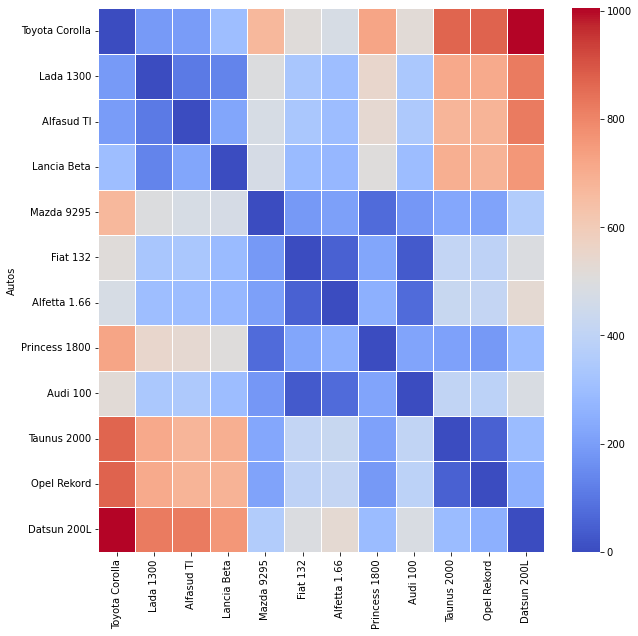

In [3]:
#heatmap des distances 
fig, axe = plt.subplots(figsize=(10,10))
sns.heatmap(D,cmap='coolwarm',linewidth=0.5,ax=axe)
plt.show()

CMDSCALE(figsize=(10, 10),
         labels=Index(['Toyota Corolla', 'Lada 1300', 'Alfasud TI', 'Lancia Beta',
       'Mazda 9295', 'Fiat 132', 'Alfetta 1.66', 'Princess 1800', 'Audi 100',
       'Taunus 2000', 'Opel Rekord', 'Datsun 200L'],
      dtype='object', name='Autos'),
         n_components=2, proximity='precomputed')

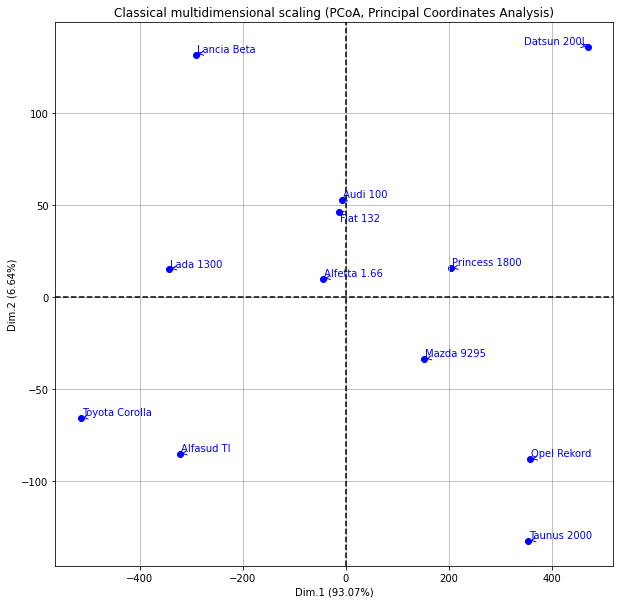

In [4]:
# Fit model - cLassic MDS
my_cmds = CMDSCALE(n_components=2,
                  labels = D.index,
                  proximity="precomputed",
                  normalized_stress=True,
                  graph=True,
                  figsize=(10,10))
my_cmds.fit(D)

In [5]:
# Valeur propres
eig = get_eig(my_cmds)
print(eig.round(3))

        eigenvalue   difference  proportion  cumulative
Dim.1  1110687.720  1031471.264      93.066      93.066
Dim.2    79216.456    77393.449       6.638      99.703


In [6]:
# Coordonnées factorielles
coord = get_mds(my_cmds)["coord"]
display(coord.round(2))

Dim.1   Dim.2
Autos                         
Toyota Corolla -514.37  -65.80
Lada 1300      -342.77   14.88
Alfasud TI     -322.67  -85.48
Lancia Beta    -290.43  131.45
Mazda 9295      151.93  -33.80
Fiat 132        -13.72   46.16
Alfetta 1.66    -44.53    9.76
Princess 1800   203.30   15.42
Audi 100         -7.65   52.42
Taunus 2000     353.77 -132.49
Opel Rekord     357.45  -88.16
Datsun 200L     469.67  135.64

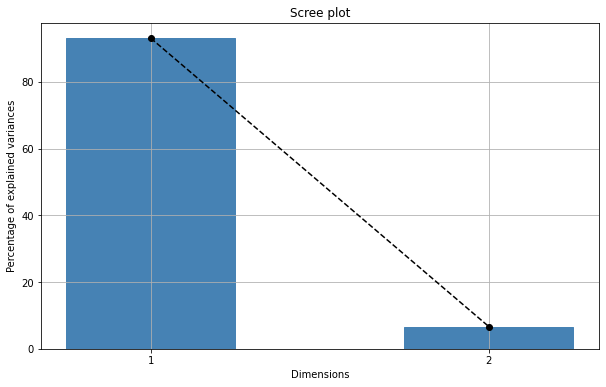

In [7]:
fig,axe =plt.subplots(figsize=(10,6))
plot_eigenvalues(my_cmds,ax=axe)

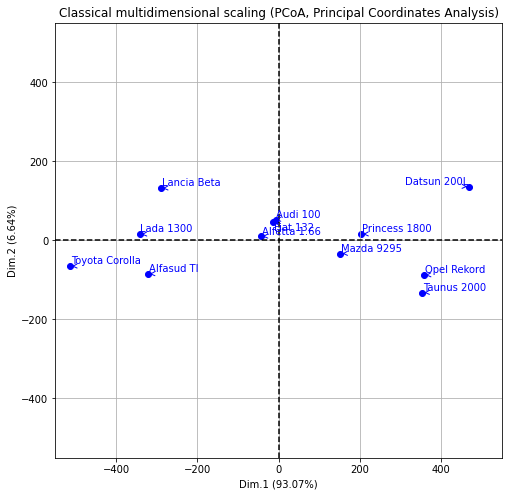

In [8]:
# Représentation des coordonnées
fig, axe = plt.subplots(figsize=(8,8))
plotCMDS(my_cmds,xlim=(-550,550),ylim=(-550,550),repel=True,ax=axe)

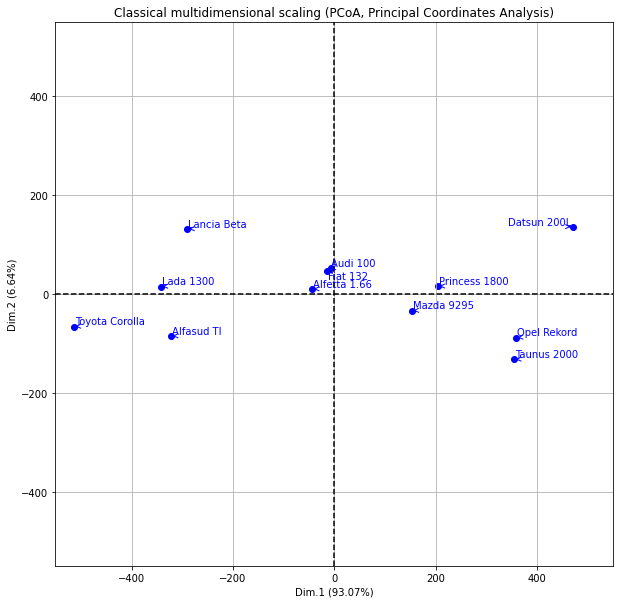

In [9]:
fig, axe =plt.subplots(figsize=(10,10))
plotCMDS(my_cmds,xlim=(-550,550),ylim=(-550,550),repel=True,ax=axe)

In [10]:
res_D = get_mds(my_cmds)["res.dist"]
display(res_D.round(2))

Autos           Toyota Corolla  Lada 1300  Alfasud TI  Lancia Beta  \
Autos                                                                
Toyota Corolla            0.00     189.62      192.71       298.42   
Lada 1300               189.62       0.00      102.35       127.79   
Alfasud TI              192.71     102.35        0.00       219.32   
Lancia Beta             298.42     127.79      219.32         0.00   
Mazda 9295              667.06     497.08      477.40       472.22   
Fiat 132                513.02     330.53      335.83       289.56   
Alfetta 1.66            475.88     298.28      294.00       274.37   
Princess 1800           722.25     546.07      535.57       507.19   
Audi 100                520.33     337.21      343.88       293.62   
Taunus 2000             870.70     711.96      678.08       696.18   
Opel Rekord             872.11     707.76      680.13       684.09   
Datsun 200L            1004.44     821.36      822.61       760.11   

Autos           Mazda 9295  Fiat 132  Alfetta 1.66  Princess 1800  Audi 100  \
Autos                                                                         
Toyota Corolla      667.06    513.02        475.88         722.25    520.33   
Lada 1300           497.08    330.53        298.28         546.07    337.21   
Alfasud TI          477.40    335.83        294.00         535.57    343.88   
Lancia Beta         472.22    289.56        274.37         507.19    293.62   
Mazda 9295            0.00    183.93        201.23          71.15    181.38   
Fiat 132            183.93      0.00         47.68         219.19      8.72   
Alfetta 1.66        201.23     47.68          0.00         247.90     56.39   
Princess 1800        71.15    219.19        247.90           0.00    214.17   
Audi 100            181.38      8.72         56.39         214.17      0.00   
Taunus 2000         224.68    408.61        422.94         210.99    405.98   
Opel Rekord         212.59    394.73        413.74         185.72    391.23   
Datsun 200L         360.09    491.60        529.38         292.24    484.52   

Autos           Taunus 2000  Opel Rekord  Datsun 200L  
Autos                                                  
Toyota Corolla       870.70       872.11      1004.44  
Lada 1300            711.96       707.76       821.36  
Alfasud TI           678.08       680.13       822.61  
Lancia Beta          696.18       684.09       760.11  
Mazda 9295           224.68       212.59       360.09  
Fiat 132             408.61       394.73       491.60  
Alfetta 1.66         422.94       413.74       529.38  
Princess 1800        210.99       185.72       292.24  
Audi 100             405.98       391.23       484.52  
Taunus 2000            0.00        44.48       292.10  
Opel Rekord           44.48         0.00       250.36  
Datsun 200L          292.10       250.36         0.00

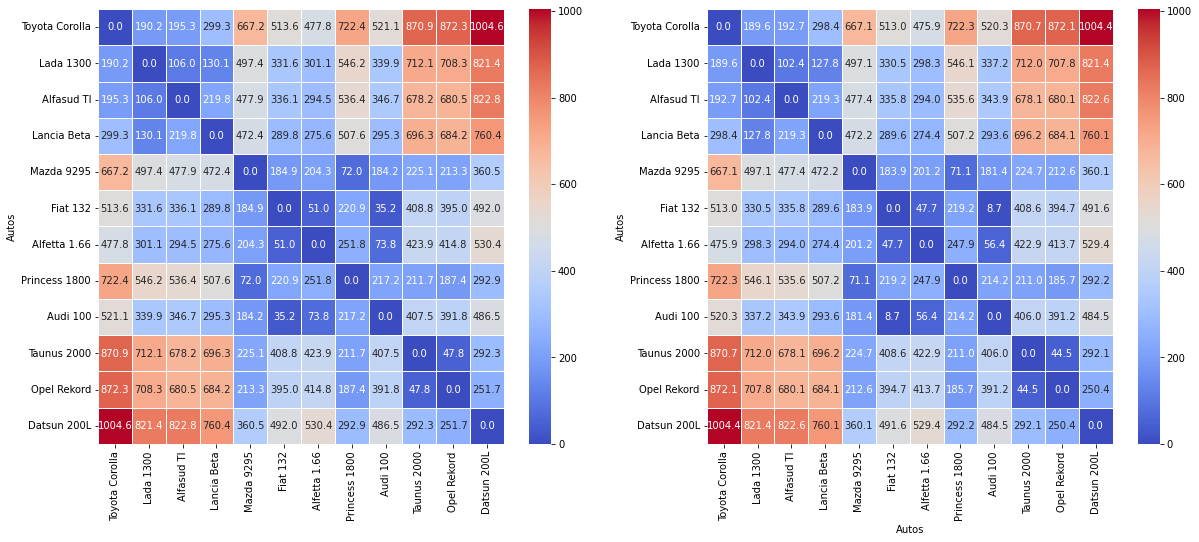

In [11]:
# Représentation graphique
fig, axe = plt.subplots(1,2,figsize=(20,8))
sns.heatmap(D,cmap='coolwarm',annot=True,linewidth=0.5,fmt=".1f",ax=axe[0])
sns.heatmap(res_D,cmap='coolwarm',annot=True,linewidth=0.5,fmt=".1f",ax=axe[1])
plt.show()

In [12]:
#Calcul du stress
print(my_cmds.stress_)

0.008962132453455555


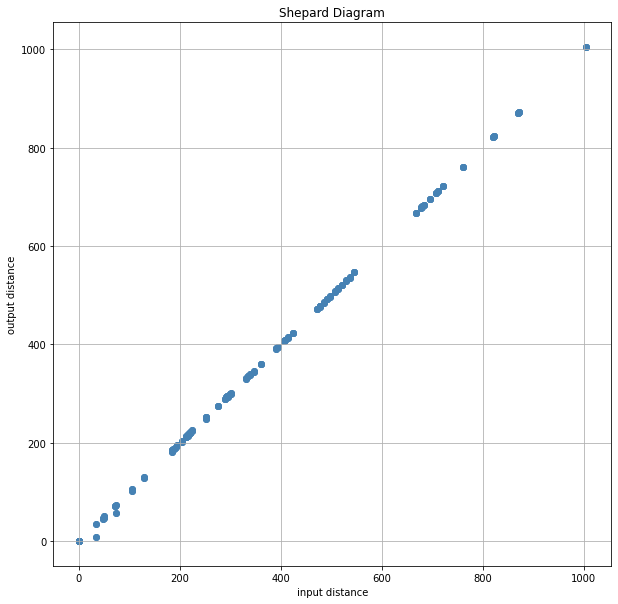

In [13]:
# Diagramme de Shepard
fig, axe = plt.subplots(figsize=(10,10))
plot_shepard(my_cmds,ax=axe)

In [14]:
# Individus supplémentaire
DSupp = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="AUTOS_MDS_SUPP",index_col=0)
print(DSupp.transpose())

Modele          Citroen GS Club   Renault 30  Peugeot 504
Toyota Corolla       129.162688  1583.989583   720.653176
Lada 1300             77.942286  1420.483368   544.458447
Alfasud TI           144.710055  1391.167495   535.104663
Lancia Beta          170.552045  1389.010439   505.812218
Mazda 9295           572.718081   924.179636    72.027772
Fiat 132             406.016010  1100.836500   219.437918
Alfetta 1.66         375.948135  1124.952888   250.812679
Princess 1800        621.662288   882.159849     7.348469
Audi 100             412.922511  1097.450227   215.083705
Taunus 2000          787.067341   713.522950   214.151815
Opel Rekord          783.369006   714.217754   189.755105
Datsun 200L          895.715357   668.528234   294.339940


In [15]:
my_cmds.transform(DSupp)

array([[-418.26008339,   19.70701955],
       [1065.89114162, -165.82406429],
       [ 201.47859743,   16.49977984]])

In [16]:
DRaw = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="AUTOS_MDS_SOURCE",index_col=0)
print(DRaw)

                 CYL  PUISS  LONG  LARG  POIDS  VMAX
Modele                                              
Toyota Corolla  1166     55   399   157    815   140
Lada 1300       1294     68   404   161    955   140
Alfasud TI      1350     79   393   161    870   165
Lancia Beta     1297     82   429   169   1080   160
Mazda 9295      1769     83   440   165   1095   165
Fiat 132        1585     98   439   164   1105   165
Alfetta 1.66    1570    109   428   162   1060   175
Princess 1800   1798     82   445   172   1160   158
Audi 100        1588     85   468   177   1110   160
Taunus 2000     1993     98   438   170   1080   167
Opel Rekord     1979    100   459   173   1120   173
Datsun 200L     1998    115   469   169   1370   160


CMDSCALE(figsize=(10, 10),
         labels=Index(['Toyota Corolla', 'Lada 1300', 'Alfasud TI', 'Lancia Beta',
       'Mazda 9295', 'Fiat 132', 'Alfetta 1.66', 'Princess 1800', 'Audi 100',
       'Taunus 2000', 'Opel Rekord', 'Datsun 200L'],
      dtype='object', name='Autos'),
         n_components=2)

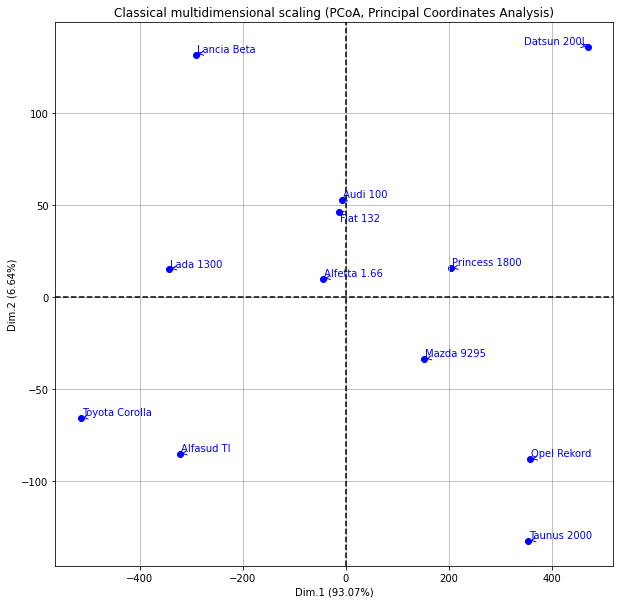

In [17]:
my_cmds2=CMDSCALE(n_components=2,
                 labels = D.index,
                 proximity="euclidean",
                 normalized_stress=True,
                 graph=True,
                 figsize=(10,10))
my_cmds2.fit(DRaw)

In [18]:
# Valeurs propres
eig2 = get_eig(my_cmds2)
print(eig2.round(2))

       eigenvalue  difference  proportion  cumulative
Dim.1  1110687.72  1031471.26       93.07       93.07
Dim.2    79216.46    77393.45        6.64       99.70


In [19]:
D = pd.read_excel("Data_Methodes_Factorielles.xlsx",index_col=0,sheet_name="DATA_ACP_ACTIF")
D = D.loc[DSupp.index,:]
D

CYL  PUISS  LONG  LARG  POIDS  VMAX
Modele                                               
Citroen GS Club  1222     59   412   161    930   151
Renault 30       2664    128   452   173   1320   180
Peugeot 504      1796     79   449   169   1160   154

In [20]:
pd.DataFrame(my_cmds2.transform(D))

0           1
0  -418.260083   19.707020
1  1065.891142 -165.824064
2   201.478597   16.499780

## MDS et PCA

In [21]:
# ACP non normée
from scientisttools.decomposition import PCA
from scientisttools.extractfactor import get_pca_ind
my_pca = PCA(normalize=False,
             n_components=2,
             row_labels=DRaw.index,
             col_labels=DRaw.columns,
             graph=True,
             figsize=(10,10)).fit(DRaw)

In [22]:
coord2 = get_pca_ind(my_pca)["coord"]
display(coord2.round(2))

Dim.1   Dim.2
Modele                        
Toyota Corolla -514.37   65.80
Lada 1300      -342.77  -14.88
Alfasud TI     -322.67   85.48
Lancia Beta    -290.43 -131.45
Mazda 9295      151.93   33.80
Fiat 132        -13.72  -46.16
Alfetta 1.66    -44.53   -9.76
Princess 1800   203.30  -15.42
Audi 100         -7.65  -52.42
Taunus 2000     353.77  132.49
Opel Rekord     357.45   88.16
Datsun 200L     469.67 -135.64